<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/Summary_image_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is used to create a set of plots of the available .png images.

The plot is built using a spreadsheet called `coloc_datasets`, which is located in Turi_lab/Data/Psilocybin_project/Stephanies/analysis/date.

* 3/9/2024 setup

In [ ]:
# !git clone https://github.com/GergelyTuri/context-project.git

In [ ]:
# %cd context-project/
# !pip install .

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import join, dirname
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('coloc_datasets').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
coloc_data = pd.DataFrame.from_records(rows[1:], columns=rows[0])
coloc_data

,xml,image,,,Pass/Fail
0,/content/drive/Shareddrives/Turi_lab/Data/psil...,Series9_comp_bck_sub.png,,,
1,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series1.png,,,
2,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series10.png,,,
3,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series4.png,,,Need to recount
4,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series13.png,,,
5,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series14.png,,,
6,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series15.png,,,
7,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series16.png,,,
8,/content/drive/Shareddrives/Turi_lab/Data/psil...,CounterWindowComposite_series11.png,,,


In [18]:
def construct_file_path(row):
    return join(dirname(row['xml']), row['image'])

In [23]:
coloc_data['file_path'] = coloc_data.apply(construct_file_path, axis=1)

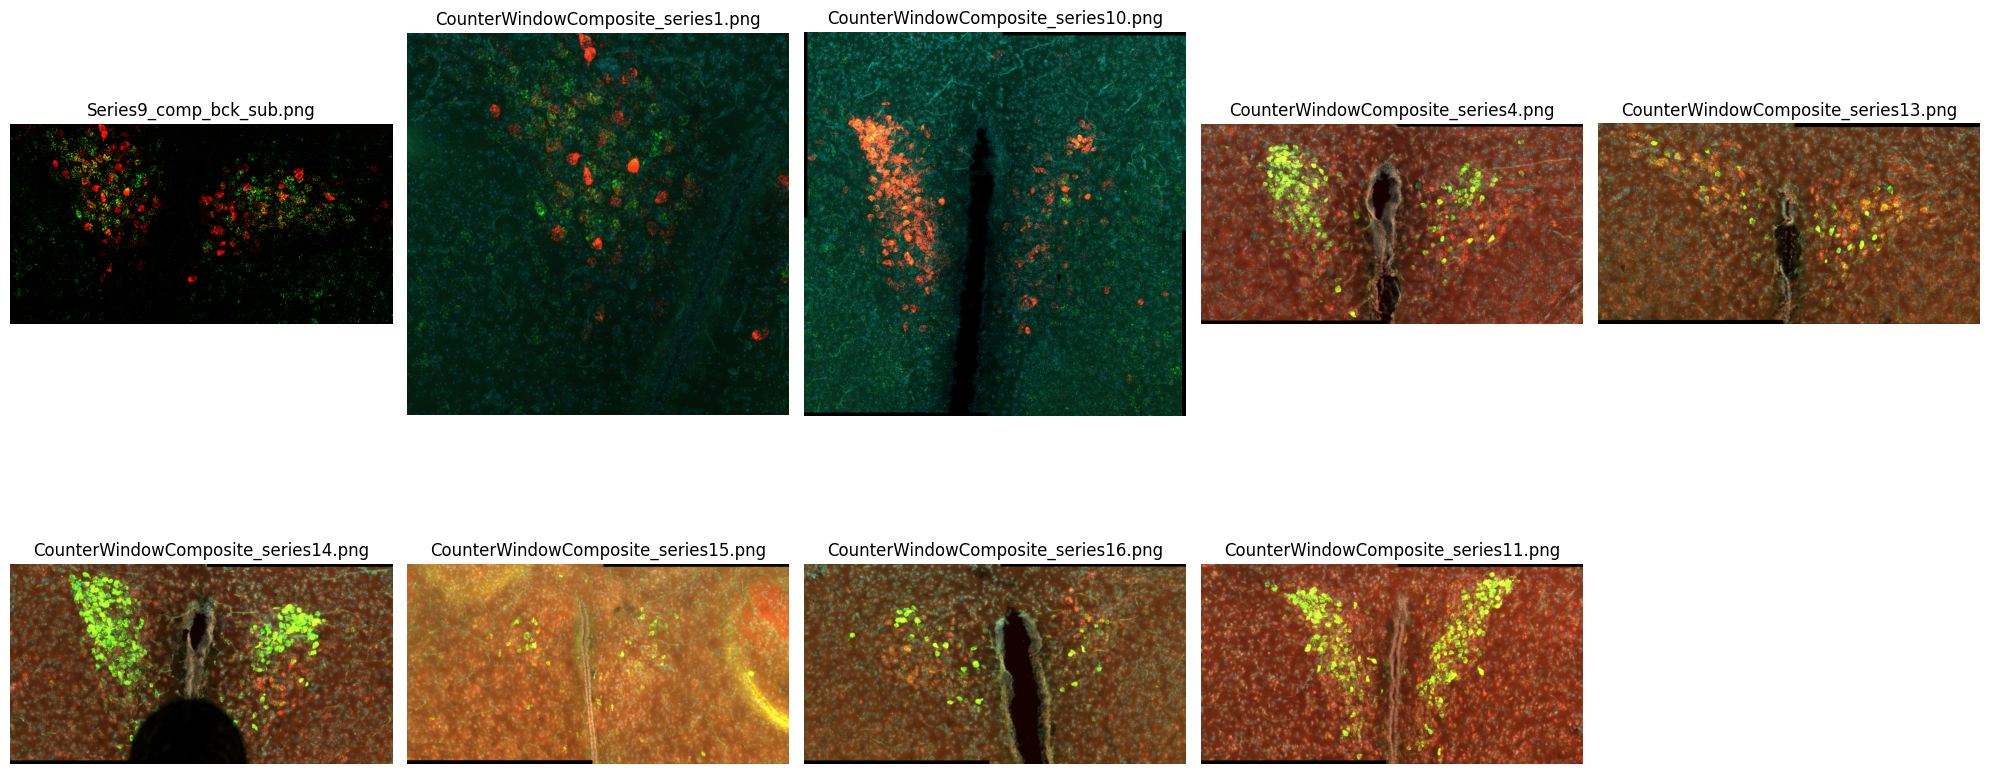

In [26]:
fig = plt.figure(figsize=(20, 10))

for i, (file_path, image_title) in enumerate(zip(coloc_data['file_path'],coloc_data['image']), start=1):
    img = mpimg.imread(file_path)
    ax = fig.add_subplot(2, 5, i)  # Adjust grid dimensions (rows, cols) as needed
    ax.imshow(img)
    ax.axis('off')  # Remove axis
    ax.set_title(image_title)

plt.tight_layout()
plt.show()